In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset=pd.read_csv('dengue.csv')
dataset.head()

,s.no,gender,age,country,state,hospital,year,temp,vomiting,eyepain,platelets,fatigue,fever,musclepain,skinrash,disease
0,1,M,3,IND,TN,APPLO,2018,104,Y,Y,90000,Y,H,Y,Y,P
1,2,M,6,IND,AP,GOVT,2018,97,N,Y,160000,N,L,N,N,N
2,3,M,5,IND,KL,GOVT,2018,98,N,N,400000,N,H,N,N,N
3,4,M,9,IND,KA,GOVT,2018,103,Y,Y,95000,N,H,Y,N,P
4,5,F,10,IND,KA,GOVT,2018,97,N,N,200000,N,L,N,N,N


In [3]:
from sklearn.preprocessing import LabelEncoder
columnlist=['vomiting','eyepain','fatigue','fever','musclepain','skinrash','disease']
for i in columnlist:
        labelencoder_X=LabelEncoder()
        dataset[i]=labelencoder_X.fit_transform(dataset[i])
print(dataset)

     s.no gender  age country state hospital  year  temp  vomiting  eyepain  \
0       1      M    3     IND    TN    APPLO  2018   104         1        1   
1       2      M    6     IND    AP     GOVT  2018    97         0        1   
2       3      M    5     IND    KL     GOVT  2018    98         0        0   
3       4      M    9     IND    KA     GOVT  2018   103         1        1   
4       5      F   10     IND    KA     GOVT  2018    97         0        0   
5       6      F   15     IND    KA    APPLO  2018    98         0        1   
6       7      F   30     IND    KL     GOVT  2018   103         1        1   
7       8      M   52     IND    KL     GOVT  2018   103         0        1   
8       9      M   52     IND    TN     GOVT  2018   100         1        0   
9      10      F   51     IND    KA    APPLO  2018   102         0        0   
10     11      F   12     IND    TN     GOVT  2018    97         1        0   
11     12      F   31     IND    TN     GOVT  2018  

In [4]:
X=dataset.iloc[:,7:-1].values
X.shape

(1000, 8)

In [5]:
Y=dataset.iloc[:,15:].values
Y.shape

(1000, 1)

In [6]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [7]:
#Spliting the Datasets 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size =0.2,random_state=0)

In [8]:
#Building the Model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,Y_train)

/home/sands/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sands/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
Y_pred = regressor.predict(X_test) 
Y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [10]:
from sklearn.metrics import roc_auc_score
print("ACC:",roc_auc_score(Y_test,Y_pred))

ACC: 0.9951456310679612


In [11]:
from sklearn.metrics import r2_score 
error=r2_score(Y_test,Y_pred)
error

0.9799819837854069

In [12]:
#x=[102,0,0,160000,0,1,0,0]
s = input("enter dengue inputs Symptoms : ")
x = list(map(int, s.split()))
print(x)

enter dengue inputs Symptoms : 102 0 0 160000 0 1 0 0
[102, 0, 0, 160000, 0, 1, 0, 0]


In [13]:
#Y_pred = regressor.predict([[102,0,0,160000,0,1,0,0]]) 
Y_pred = regressor.predict([x]) 
Y_pred

array([0])

In [16]:
import serial
import time
#ser=serial.Serial('/dev/ttyUSB0', 9600)
ser.write(Y_pred)

NameError: name 'ser' is not defined

/home/sands/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[j])
/home/sands/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2018.0, top=2018.0
  ax.set_ylim(boundaries_list[i])
/home/sands/anaconda3/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2018.0, right=2018.0
  ax.set_xlim(boundaries_list[i])


<function matplotlib.pyplot.show(*args, **kw)>

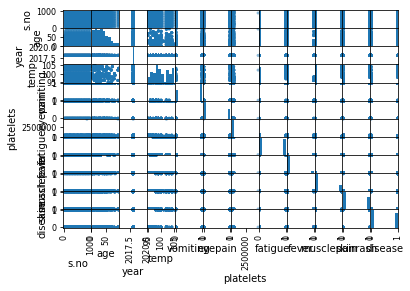

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20793c8b00>,
      dtype=object)

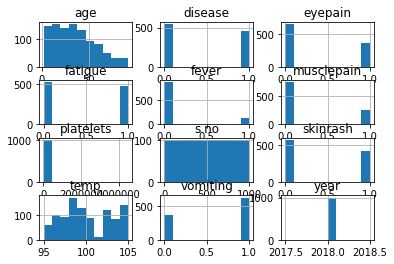

In [18]:
#dataset.plot(kind='box',subplots=True , layout=(2,2), sharex=False ,sharey=False)
#plt.show()
dataset.hist()

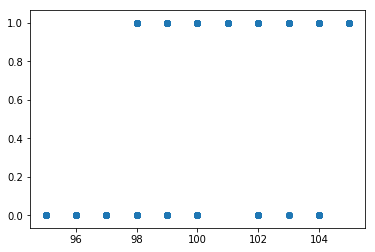

In [19]:
plt.scatter(dataset['temp'],dataset['disease'])
plt.show()


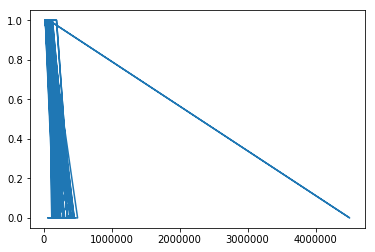

In [20]:
plt.plot(dataset['platelets'],dataset['disease'])
plt.show()


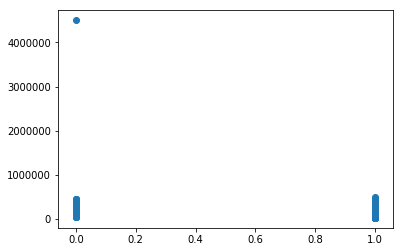

In [21]:
plt.scatter(dataset['vomiting'],dataset['platelets'])
plt.show()